In [1]:
import numpy as np
import pandas as pd
import os
import time
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans



In [3]:
from google.colab import drive
drive.mount('/content/drive/')
data_path=('/content/drive/MyDrive/CDS 529 Method/')
df =pd.read_csv(data_path+'device_price_result.csv')
df

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


,device_id,BUILDINGST,CATEGORY,geometry,price_median
0,0002d2d4-b519-4255-9167-b6c7a9fa9f5b,14851,1,POLYGON ((114.1275887314184 22.503480055715922...,12268.000000
1,000c8b3f-fc84-63b7-13b4-a674302c34b7,165947,1,POLYGON ((114.18981573054756 22.31587312977586...,14759.000000
2,d4fda248-223e-40e1-84f2-74059fa7e52b,165947,1,POLYGON ((114.18981573054756 22.31587312977586...,14759.000000
3,00151bcd-fe23-4cb8-a49c-1dbe786be2be,196955,1,POLYGON ((114.15388847222738 22.24336157788059...,14820.666667
4,0017a194-88d2-60aa-ac31-f79c90d9bf1d,147304,1,"POLYGON ((114.17636087533431 22.3201767632441,...",12052.000000
...,...,...,...,...,...
34488,ff82e382-22e4-4109-97a9-cbeaf62d6147,173381,1,"POLYGON ((114.14671004869301 22.2832171737713,...",24917.750000
34489,ff91dccb-dfac-485a-a4af-844cbcf024b0,167270,1,POLYGON ((114.13228653068353 22.26215579504566...,20503.000000
34490,ffaa6503-4415-4f6b-a844-f9612f67f6a0,162356,1,POLYGON ((114.19037867969257 22.31605030920743...,14759.000000
34491,ffeaeab0-f60c-6df9-a241-88f39db623f6,150642,1,POLYGON ((114.14004333819014 22.28518661097496...,26689.846154


In [4]:
Group_data = df.iloc[:,[0, -1]]
Group_data

,device_id,price_median
0,0002d2d4-b519-4255-9167-b6c7a9fa9f5b,12268.000000
1,000c8b3f-fc84-63b7-13b4-a674302c34b7,14759.000000
2,d4fda248-223e-40e1-84f2-74059fa7e52b,14759.000000
3,00151bcd-fe23-4cb8-a49c-1dbe786be2be,14820.666667
4,0017a194-88d2-60aa-ac31-f79c90d9bf1d,12052.000000
...,...,...
34488,ff82e382-22e4-4109-97a9-cbeaf62d6147,24917.750000
34489,ff91dccb-dfac-485a-a4af-844cbcf024b0,20503.000000
34490,ffaa6503-4415-4f6b-a844-f9612f67f6a0,14759.000000
34491,ffeaeab0-f60c-6df9-a241-88f39db623f6,26689.846154


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-5-2f8f01f10c37>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Group_data['cluster'] = kmeans.labels_
<ipython-input-5-2f8f01f10c37>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Group_data['class'] = Group_data['cluster'].map(label_mapping)


                                  device_id  price_median  cluster  \
0      0002d2d4-b519-4255-9167-b6c7a9fa9f5b  12268.000000        3   
1      000c8b3f-fc84-63b7-13b4-a674302c34b7  14759.000000        0   
2      d4fda248-223e-40e1-84f2-74059fa7e52b  14759.000000        0   
3      00151bcd-fe23-4cb8-a49c-1dbe786be2be  14820.666667        0   
4      0017a194-88d2-60aa-ac31-f79c90d9bf1d  12052.000000        3   
...                                     ...           ...      ...   
34488  ff82e382-22e4-4109-97a9-cbeaf62d6147  24917.750000        1   
34489  ff91dccb-dfac-485a-a4af-844cbcf024b0  20503.000000        1   
34490  ffaa6503-4415-4f6b-a844-f9612f67f6a0  14759.000000        0   
34491  ffeaeab0-f60c-6df9-a241-88f39db623f6  26689.846154        1   
34492  fffa70b5-2607-44de-a708-57a945ef9099  19006.666667        1   

                   class  
0              Low Class  
1           Middle Class  
2           Middle Class  
3           Middle Class  
4              Low Class

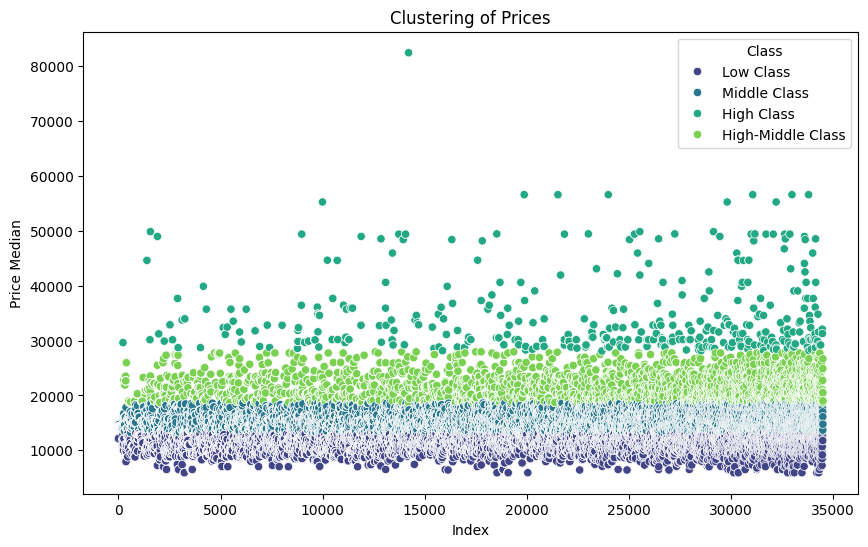

In [5]:


# Define class label
class_labels = ['Low Class', 'Middle Class', 'High-Middle Class', 'High Class']

# Extract the 'price_median' column for clustering
price_data = Group_data[['price_median']]

# Choose the number of clusters (k) you want, let's say k=4 for this example
kmeans = KMeans(n_clusters=4, random_state=42)

# Fit the model on the 'price_median' data
kmeans.fit(price_data)

# Assign the cluster labels to a new column in your original DataFrame
Group_data['cluster'] = kmeans.labels_

# Get cluster centers
cluster_centers = kmeans.cluster_centers_.flatten()

# Map the cluster indices to their centers and sort by the centers
sorted_clusters = sorted(range(len(cluster_centers)), key=lambda k: cluster_centers[k])

# Create a mapping from sorted cluster indices to class labels
label_mapping = {sorted_clusters[i]: class_labels[i] for i in range(4)}

# Map the sorted cluster indices to the DataFrame
Group_data['class'] = Group_data['cluster'].map(label_mapping)

# Print the DataFrame with the new 'cluster' and 'class' columns
print(Group_data)

# Plot the clusters using Seaborn for consistency
plt.figure(figsize=(10, 6))
sns.scatterplot(data=Group_data, x=Group_data.index, y='price_median', hue='class', palette='viridis')
plt.xlabel('Index')
plt.ylabel('Price Median')
plt.title('Clustering of Prices')

# Create a custom legend for the clusters with seaborn
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles=handles, labels=labels, title="Class")

plt.show()


In [6]:
# Show every class people
class_counts = Group_data['class'].value_counts()
class_counts

class
Low Class            14863
Middle Class         13977
High-Middle Class     4882
High Class             771
Name: count, dtype: int64

<ipython-input-7-5c984582ae88>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=Group_data, x='class', order=class_labels, palette='viridis')


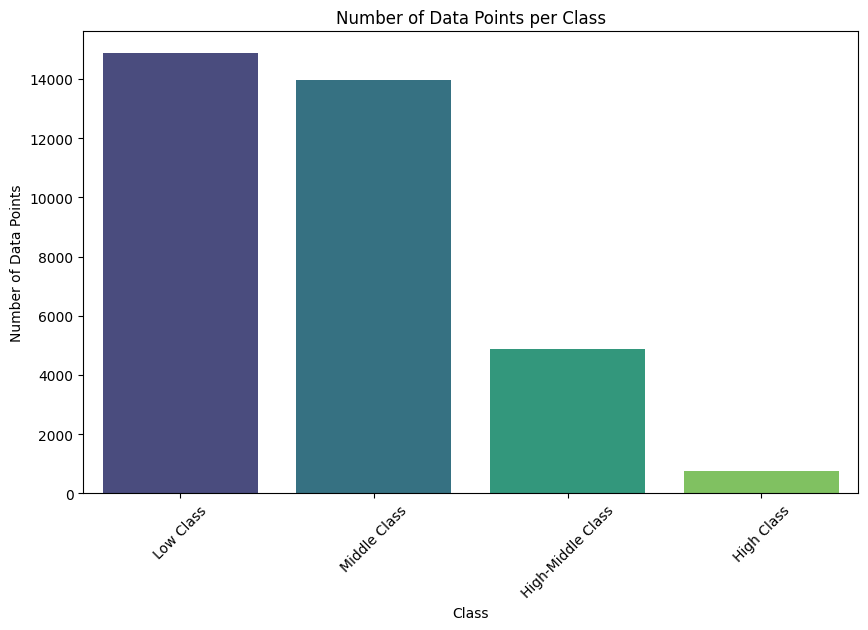

In [7]:
# Plot the count of each class using Seaborn
plt.figure(figsize=(10, 6))
sns.countplot(data=Group_data, x='class', order=class_labels, palette='viridis')
plt.xlabel('Class')
plt.ylabel('Number of Data Points')
plt.title('Number of Data Points per Class')
plt.xticks(rotation=45)

plt.show()

In [8]:
merged_df = pd.merge(df, Group_data, on='device_id', how='inner')
merged_df

,device_id,BUILDINGST,CATEGORY,geometry,price_median_x,price_median_y,cluster,class
0,0002d2d4-b519-4255-9167-b6c7a9fa9f5b,14851,1,POLYGON ((114.1275887314184 22.503480055715922...,12268.000000,12268.000000,3,Low Class
1,000c8b3f-fc84-63b7-13b4-a674302c34b7,165947,1,POLYGON ((114.18981573054756 22.31587312977586...,14759.000000,14759.000000,0,Middle Class
2,d4fda248-223e-40e1-84f2-74059fa7e52b,165947,1,POLYGON ((114.18981573054756 22.31587312977586...,14759.000000,14759.000000,0,Middle Class
3,00151bcd-fe23-4cb8-a49c-1dbe786be2be,196955,1,POLYGON ((114.15388847222738 22.24336157788059...,14820.666667,14820.666667,0,Middle Class
4,0017a194-88d2-60aa-ac31-f79c90d9bf1d,147304,1,"POLYGON ((114.17636087533431 22.3201767632441,...",12052.000000,12052.000000,3,Low Class
...,...,...,...,...,...,...,...,...
34488,ff82e382-22e4-4109-97a9-cbeaf62d6147,173381,1,"POLYGON ((114.14671004869301 22.2832171737713,...",24917.750000,24917.750000,1,High-Middle Class
34489,ff91dccb-dfac-485a-a4af-844cbcf024b0,167270,1,POLYGON ((114.13228653068353 22.26215579504566...,20503.000000,20503.000000,1,High-Middle Class
34490,ffaa6503-4415-4f6b-a844-f9612f67f6a0,162356,1,POLYGON ((114.19037867969257 22.31605030920743...,14759.000000,14759.000000,0,Middle Class
34491,ffeaeab0-f60c-6df9-a241-88f39db623f6,150642,1,POLYGON ((114.14004333819014 22.28518661097496...,26689.846154,26689.846154,1,High-Middle Class


In [9]:
class_for_category_2 = merged_df[merged_df['CATEGORY'] == 2]['class'].unique()
print("Classes for category 2:", class_for_category_2)
class_for_category_3 = merged_df[merged_df['CATEGORY'] == 3]['class'].unique()
print("Classes for category 3:", class_for_category_3)

Classes for category 2: ['Middle Class' 'Low Class']
Classes for category 3: ['Low Class' 'Middle Class' 'High-Middle Class' 'High Class']


In [ ]:
# Group by 'class' and find the minimum 'price_median' for each class
min_prices_by_class = merged_df.groupby('class')['price_median_y'].min().reset_index()
print("Minimum price for each class:")
print(min_prices_by_class)

# Filter the DataFrame for 'High Class', then find the maximum 'price_median'
max_price_high_class = merged_df[merged_df['class'] == 'High Class']['price_median_y'].max()
print("Maximum price for High Class:", max_price_high_class)

Minimum price for each class:
               class  price_median_y
0         High Class    28100.030303
1  High-Middle Class    18701.000000
2          Low Class     5910.000000
3       Middle Class    13190.000000
Maximum price for High Class: 82484.0


In [ ]:
merged_df.to_csv(data_path + 'Group_data.csv', index=False)